In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
from faker import Faker
import numpy as np

# Instantiate Faker object
fake = Faker()
Faker.seed(27)

# Create a DataFrame for employees
num_employees = 200
departments = ['Engineering', 'Finance', 'HR', 'Marketing', 'Sales', 'IT']

years_with_company = np.random.randint(1, 10, size=num_employees)
salary = 40000 + 2000 * years_with_company * np.random.randn()

employee_data = {
	'EmployeeID': np.arange(1, num_employees + 1),
	'FirstName': [fake.first_name() for _ in range(num_employees)],
	'LastName': [fake.last_name() for _ in range(num_employees)],
	'Age': np.random.randint(22, 60, size=num_employees),
	'Department': [fake.random_element(departments) for _ in range(num_employees)],
	'Salary': np.round(salary),
	'YearsWithCompany': years_with_company
}

df_employees = pd.DataFrame(employee_data)

# Display the head of the DataFrame
df_employees.head(10)

,EmployeeID,FirstName,LastName,Age,Department,Salary,YearsWithCompany
0,1,Deborah,Adams,22,Sales,10435.0,9
1,2,Jacqueline,Green,51,HR,36715.0,1
2,3,Susan,Whitaker,27,IT,20290.0,6
3,4,James,Rodriguez,59,Engineering,36715.0,1
4,5,Cameron,Murray,26,Sales,17005.0,7
5,6,Madison,Williams,51,HR,36715.0,1
6,7,Mason,Brown,59,Sales,26860.0,4
7,8,Nathan,Allison,57,IT,17005.0,7
8,9,Lisa,Mueller,23,IT,20290.0,6
9,10,Isaac,Spears,40,HR,10435.0,9


<Axes: title={'center': 'Scatter Plot:amžius ir pajamos'}, xlabel='Amžius', ylabel='Pajamos'>

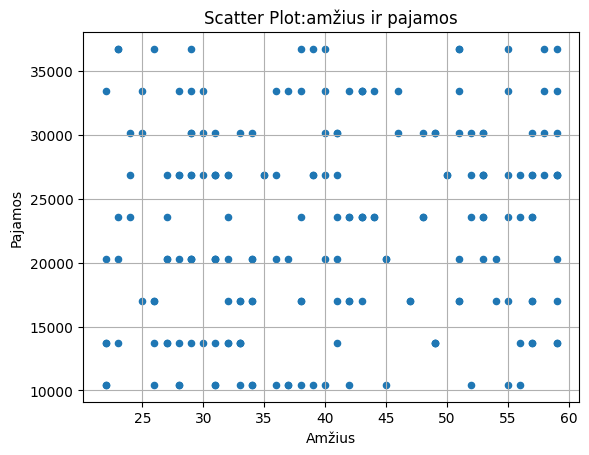

In [6]:
# Scatter Plot: Age vs Salary
df_employees.plot.scatter(x='Age', y='Salary', title='Scatter Plot:amžius ir pajamos', xlabel='Amžius', ylabel='Pajamos', grid=True)

<Axes: title={'center': 'Atlygis pagal metus'}, xlabel='Metai kompanijoje', ylabel='Atlygis'>

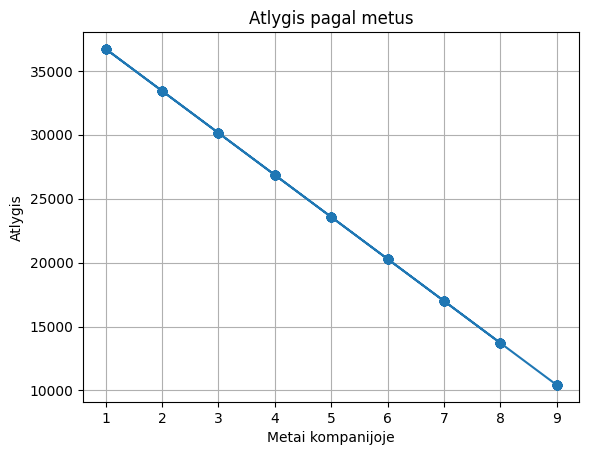

In [10]:

df_employees.plot.line(x='YearsWithCompany', y='Salary', marker='o', linestyle='-', title='Atlygis pagal metus',
                       xlabel='Metai kompanijoje', ylabel='Atlygis', legend=False, grid=True)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

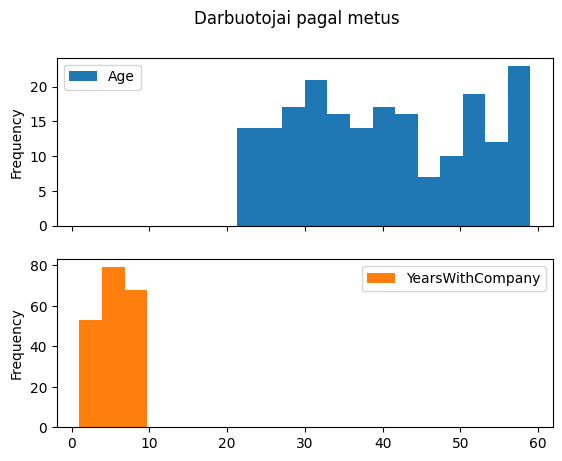

In [14]:
# Histogram: Distribution of Ages
df_employees[['Age','YearsWithCompany']].plot.hist(title='Darbuotojai pagal metus', bins=20, subplots=True)


<Axes: title={'center': 'Salary'}, ylabel='Department'>

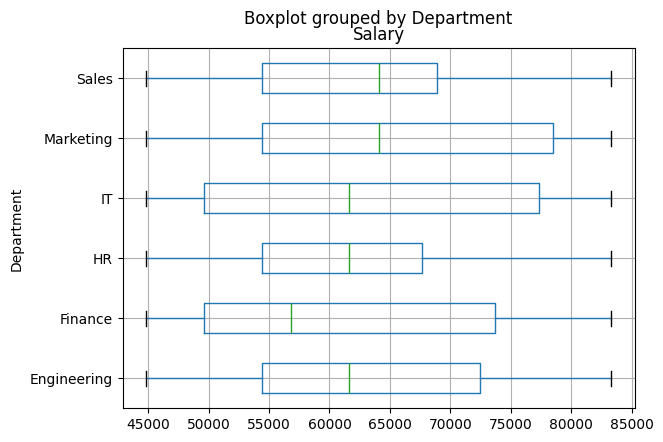

In [17]:
# Box Plot: Salary distribution by Department
df_employees.boxplot(column='Salary', by='Department', grid=True, vert=False)


<Axes: title={'center': 'Darbuotojai pagal padalinį'}, xlabel='Padalinys'>

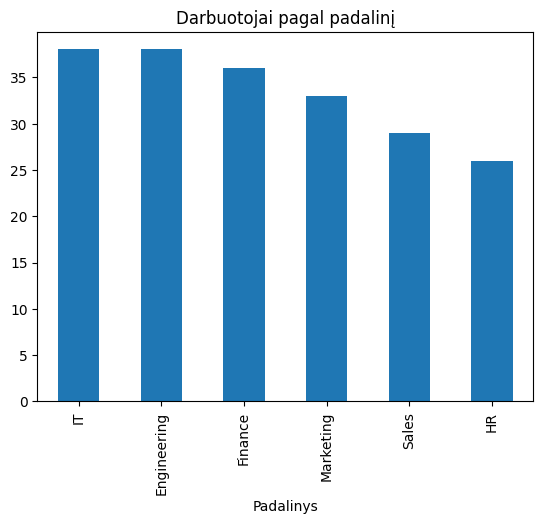

In [20]:
# Bar Plot: Department-wise employee count
df_employees['Department'].value_counts().plot.bar(title='Darbuotojai pagal padalinį', xlabel='Padalinys')

<Axes: title={'center': 'Kaupiamas atlyginimų pasiskirstymas pagal amžiaus grupes'}, xlabel='Amžiaus grupė', ylabel='Pajamos'>

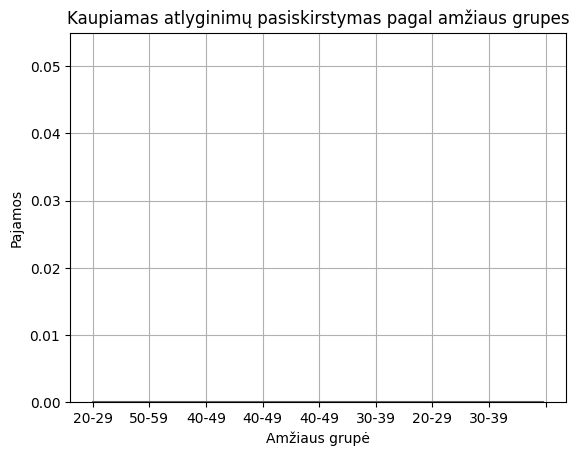

In [20]:
# Area Plot: Cumulative Salary Distribution Over Age Groups
df_employees['AgeGroup'] = pd.cut(df_employees['Age'], bins=[20, 30, 40, 50, 60], labels=['20-29', '30-39', '40-49', '50-59'])
cumulative_salary_by_age_group = df_employees.groupby('AgeGroup')['Salary'].sum()

df_employees['CumulativeSalaryByAgeGroup'] = cumulative_salary_by_age_group

df_employees.plot.area(x='AgeGroup', y='CumulativeSalaryByAgeGroup', title='Kaupiamas atlyginimų pasiskirstymas pagal amžiaus grupes', 
                       xlabel='Amžiaus grupė', ylabel='Pajamos', legend=False, grid=True)

In [17]:
df_employees['AgeGroup'] = pd.cut(df_employees['Age'], bins=[20, 30, 40, 50, 60], labels=['20-29', '30-39', '40-49', '50-59'])


In [21]:
cumulative_salary_by_age_group


AgeGroup
20-29    1112470.0
30-39    1205805.0
40-49     936430.0
50-59    1315755.0
Name: Salary, dtype: float64

<Axes: title={'center': 'Padaliniai pagal pajamas'}, ylabel='Salary'>

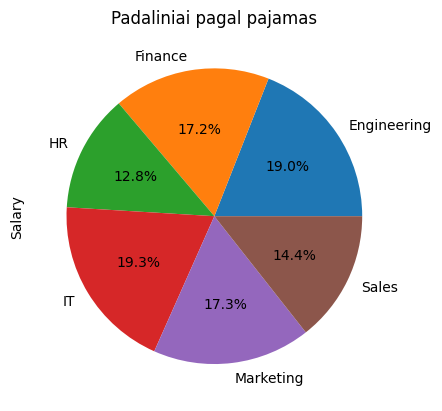

In [27]:
# Pie Chart: Department-wise Salary distribution
df_employees.groupby('Department')['Salary'].sum().plot.pie(title='Padaliniai pagal pajamas', autopct='%1.1f%%')